In [66]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re


In [70]:
# Load dataset
df = pd.read_csv("netflix_reviews.csv")
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,0cca470b-9f9b-4883-9d48-427d636fb1b7,Amruta Gaikwad,This AAP I very nice 😍🤩😊☺️🥰🤩🤩,5,0,NaN,2025-06-11 13:06:16,NaN
1,ad0b800a-aad3-4fa5-ae00-3c48b1dc7a91,Gopi M,very good,5,0,NaN,2025-06-11 12:53:09,NaN
2,7a871104-e67d-4bd3-a3cc-3d2b2d90d758,Matshepo Motsamai,I love it🥹🥹,5,0,9.18.2 build 10 62780,2025-06-11 12:52:12,9.18.2 build 10 62780
3,af90d213-064e-41a4-aa48-8091ff632a9d,Mariz Pulga,"It's annoying, i cant watch. it keeps on sayin...",2,0,9.19.2 build 8 62796,2025-06-11 12:47:15,9.19.2 build 8 62796
4,2f35bd30-9d06-43bd-88ec-4839a38f72ee,Emmanuel Kyere,this app is good u can all kinds of movies,5,0,NaN,2025-06-11 12:41:49,NaN


In [72]:
#Remove rows with null primary key (reviewId)
df = df[df['reviewId'].notnull()]



In [74]:
# Drop duplicates based on primary key
df.drop_duplicates(subset=['reviewId'], keep='first', inplace=True)



In [76]:
#  Check and handle nulls column-wise
print("Nulls in reviewId:", df['reviewId'].isnull().sum())
print("Nulls in userName:", df['userName'].isnull().sum())
print("Nulls in content:", df['content'].isnull().sum())
print("Nulls in score:", df['score'].isnull().sum())
print("Nulls in reviewCreatedVersion:", df['reviewCreatedVersion'].isnull().sum())
print("Nulls in appVersion:", df['appVersion'].isnull().sum())



Nulls in reviewId: 0
Nulls in userName: 2
Nulls in content: 6
Nulls in score: 0
Nulls in reviewCreatedVersion: 23258
Nulls in appVersion: 23258


In [82]:
# Fill missing values
df['content'] = df['content'].fillna("No review")
df['appVersion'] = df['appVersion'].replace("", "NA").fillna("NA")
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].replace("", "NA").fillna("NA")

df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,0cca470b-9f9b-4883-9d48-427d636fb1b7,Amruta Gaikwad,This AAP I very nice 😍🤩😊☺️🥰🤩🤩,5,0,NA,2025-06-11 13:06:16,NA
1,ad0b800a-aad3-4fa5-ae00-3c48b1dc7a91,Gopi M,very good,5,0,NA,2025-06-11 12:53:09,NA
2,7a871104-e67d-4bd3-a3cc-3d2b2d90d758,Matshepo Motsamai,I love it🥹🥹,5,0,9.18.2 build 10 62780,2025-06-11 12:52:12,9.18.2 build 10 62780
3,af90d213-064e-41a4-aa48-8091ff632a9d,Mariz Pulga,"It's annoying, i cant watch. it keeps on sayin...",2,0,9.19.2 build 8 62796,2025-06-11 12:47:15,9.19.2 build 8 62796
4,2f35bd30-9d06-43bd-88ec-4839a38f72ee,Emmanuel Kyere,this app is good u can all kinds of movies,5,0,NA,2025-06-11 12:41:49,NA


In [86]:
#Explore columns individually
print("Unique Scores:", df['score'].unique())
print("Review Date Range:", df['at'].min(), "to", df['at'].max())



Unique Scores: [5 2 1 3 4]
Review Date Range: 2018-09-12 07:22:12 to 2025-06-11 13:06:16


In [88]:
# Word analysis 
word_list = []
df['content'].apply(lambda x: word_list.extend(str(x).split()))
word_series = pd.Series(word_list)
print("Total words in all reviews:", len(word_series))
print("Total unique words:", word_series.nunique())
print("Top 10 common words:\n", word_series.value_counts().head(10))



Total words in all reviews: 3703596
Total unique words: 127138
Top 10 common words:
 the    117404
to     102730
I      102048
and     94088
it      66612
is      61221
a       54107
my      46062
of      42284
app     40818
Name: count, dtype: int64


In [90]:
#Final shape and null check
print("Final Dataset Shape:", df.shape)
print("Nulls After Cleaning:\n", df.isnull().sum())



Final Dataset Shape: (136689, 8)
Nulls After Cleaning:
 reviewId                0
userName                2
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
appVersion              0
dtype: int64


In [94]:
df.columns  # Column names

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')

In [96]:
df.info()  # Data types and null values

<class 'pandas.core.frame.DataFrame'>
Index: 136689 entries, 0 to 137929
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              136689 non-null  object
 1   userName              136687 non-null  object
 2   content               136689 non-null  object
 3   score                 136689 non-null  int64 
 4   thumbsUpCount         136689 non-null  int64 
 5   reviewCreatedVersion  136689 non-null  object
 6   at                    136689 non-null  object
 7   appVersion            136689 non-null  object
dtypes: int64(2), object(6)
memory usage: 9.4+ MB


In [100]:
df.isnull().sum()


reviewId                0
userName                2
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
appVersion              0
dtype: int64

In [102]:
df.dropna()  # or fill with default values


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,0cca470b-9f9b-4883-9d48-427d636fb1b7,Amruta Gaikwad,This AAP I very nice 😍🤩😊☺️🥰🤩🤩,5,0,NA,2025-06-11 13:06:16,NA
1,ad0b800a-aad3-4fa5-ae00-3c48b1dc7a91,Gopi M,very good,5,0,NA,2025-06-11 12:53:09,NA
2,7a871104-e67d-4bd3-a3cc-3d2b2d90d758,Matshepo Motsamai,I love it🥹🥹,5,0,9.18.2 build 10 62780,2025-06-11 12:52:12,9.18.2 build 10 62780
3,af90d213-064e-41a4-aa48-8091ff632a9d,Mariz Pulga,"It's annoying, i cant watch. it keeps on sayin...",2,0,9.19.2 build 8 62796,2025-06-11 12:47:15,9.19.2 build 8 62796
4,2f35bd30-9d06-43bd-88ec-4839a38f72ee,Emmanuel Kyere,this app is good u can all kinds of movies,5,0,NA,2025-06-11 12:41:49,NA
...,...,...,...,...,...,...,...,...
137925,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NA,2019-08-03 15:06:03,NA
137926,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
137927,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NA,2020-08-17 07:26:58,NA
137928,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346


In [104]:
df.duplicated().sum()



0

In [27]:
df.drop_duplicates()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
2,7a871104-e67d-4bd3-a3cc-3d2b2d90d758,Matshepo Motsamai,I love it🥹🥹,5,0,9.18.2 build 10 62780,2025-06-11 12:52:12,9.18.2 build 10 62780
3,af90d213-064e-41a4-aa48-8091ff632a9d,Mariz Pulga,"It's annoying, i cant watch. it keeps on sayin...",2,0,9.19.2 build 8 62796,2025-06-11 12:47:15,9.19.2 build 8 62796
6,4df0923d-a556-442d-b77a-fa4370cf08de,Nishith Sethy,paisa nehin hai..,1,0,8.52.2 build 14 50335,2025-06-11 12:19:45,8.52.2 build 14 50335
7,46d1a26f-c1c9-4dfb-a418-796ce1c042f9,Johnrenze Jimenez,GOOD FOR ALL MOVIE'S,5,0,8.141.1 build 13 51230,2025-06-11 12:01:17,8.141.1 build 13 51230
9,239f3a30-0c69-4892-b2ec-3c73e1cc217f,Luiz Hatem,"O aplicativo é otimo, boas séries. Mas é RIDÍC...",2,0,9.18.2 build 10 62780,2025-06-11 11:53:11,9.18.2 build 10 62780
...,...,...,...,...,...,...,...,...
137922,9996579a-cf67-40a6-94eb-9ccd63c7d46a,dady mon mari,How can I delete one of the users? Please. Hel...,3,0,8.104.0 build 5 50619,2024-03-01 04:54:36,8.104.0 build 5 50619
137923,f2e61d1c-21eb-44d2-924c-35df26ed3bd2,Romnick Arcangel,Good app in easy to use,5,0,8.96.1 build 16 50568,2023-12-22 22:08:03,8.96.1 build 16 50568
137924,cbb04dd9-1a1d-46df-80a4-8ae987fe5d85,Ciaran Worthington,Everytime I watch a show it goes so dark so I ...,1,0,7.48.0 build 10 34747,2020-08-22 14:58:10,7.48.0 build 10 34747
137926,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250


In [39]:
df['text_length'] = df['content'].apply(lambda x: len(str(x)))


In [41]:
df[['content', 'text_length']].head()


,content,text_length
2,I love it🥹🥹,11
3,"It's annoying, i cant watch. it keeps on sayin...",106
6,paisa nehin hai..,17
7,GOOD FOR ALL MOVIE'S,20
9,"O aplicativo é otimo, boas séries. Mas é RIDÍC...",350


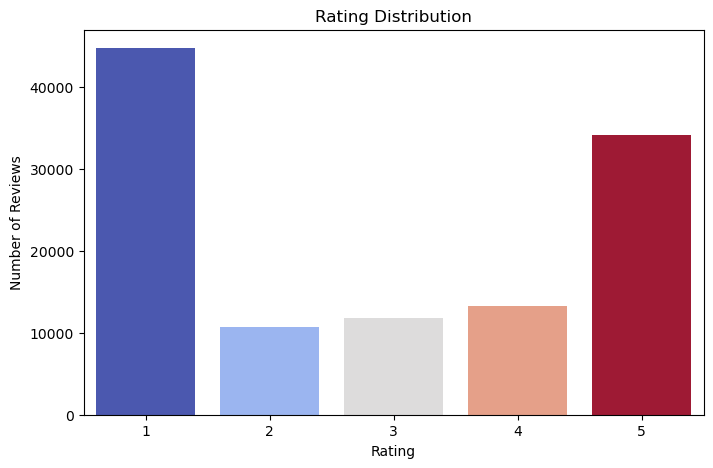

In [43]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='score', hue='score', palette='coolwarm', legend=False)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()



In [45]:
def get_sentiment(score):
    if score >= 4:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['score'].apply(get_sentiment)


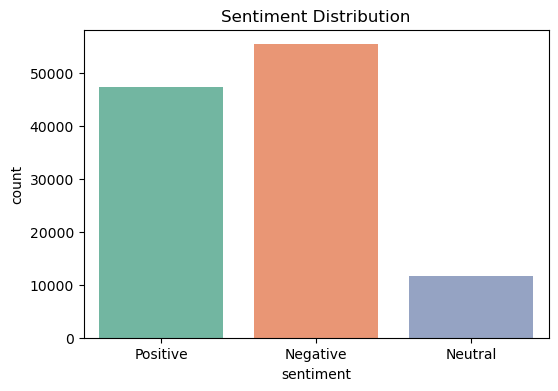

In [47]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment',hue='sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.show()


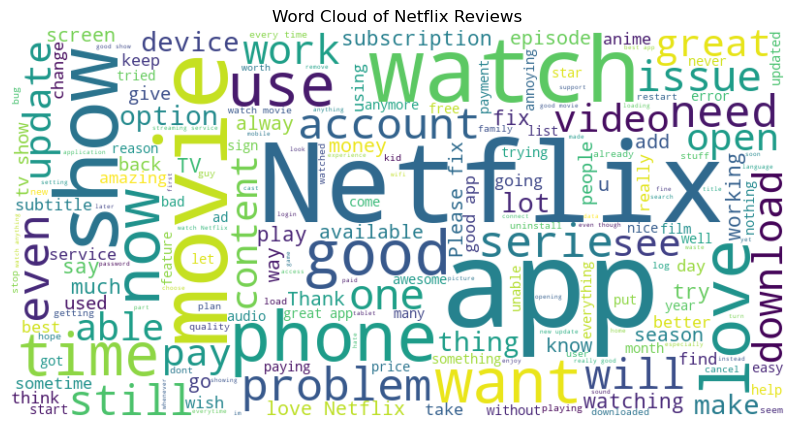

In [49]:
text = " ".join(review for review in df['content'] if isinstance(review, str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Netflix Reviews")
plt.show()


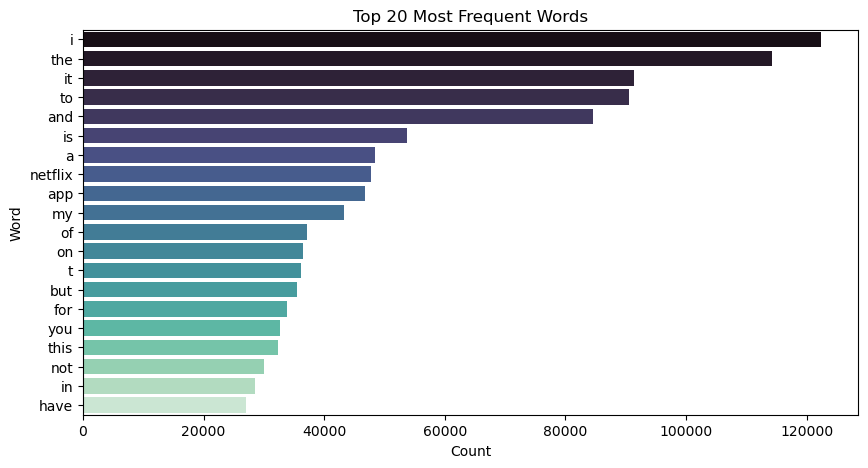

In [53]:
from collections import Counter

words = []
for review in df['content'].dropna():
    words += re.findall(r'\b\w+\b', review.lower())

common_words = Counter(words).most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

plt.figure(figsize=(10,5))
sns.barplot(data=common_words_df, x='Count', y='Word',hue='Word', palette='mako',legend=False)
plt.title("Top 20 Most Frequent Words")
plt.show()


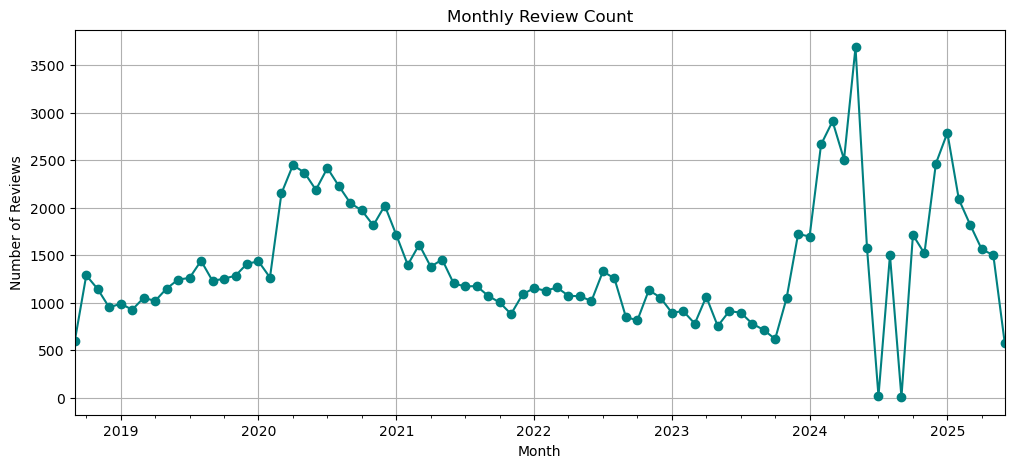

In [55]:
df['review_date'] = pd.to_datetime(df['at'])
df['review_month'] = df['review_date'].dt.to_period('M')

monthly_reviews = df.groupby('review_month').size()

monthly_reviews.plot(figsize=(12,5), marker='o', color='teal')
plt.title("Monthly Review Count")
plt.ylabel("Number of Reviews")
plt.xlabel("Month")
plt.grid(True)
plt.show()


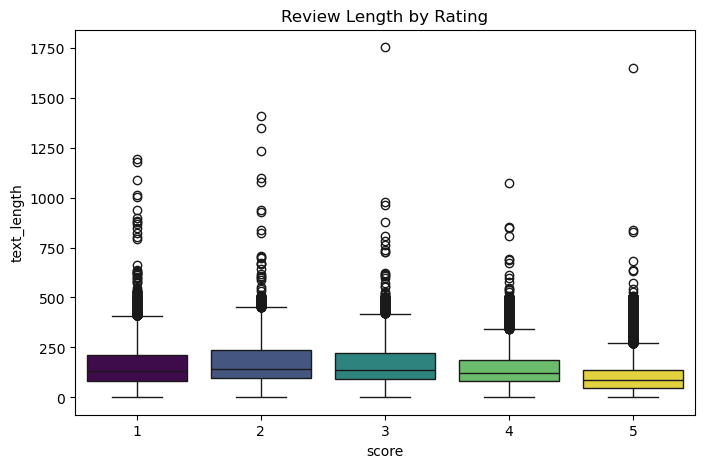

In [77]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='score',hue='score', y='text_length', palette='viridis',legend=False)
plt.title("Review Length by Rating")
plt.show()


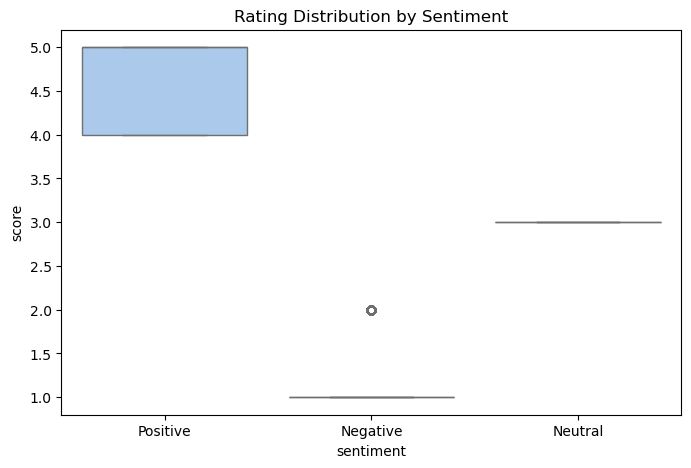

In [57]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='sentiment',hue='sentiment', y='score', palette='pastel',legend=False)
plt.title("Rating Distribution by Sentiment")
plt.show()


In [ ]:
## 🔍 Conclusion:

- Most users gave high ratings (scores of 4 or 5), indicating overall satisfaction.
- WordCloud and text length analysis showed that reviews are generally positive.
- Sentiment analysis revealed a strong correlation between high scores and positive sentiment.
- Most reviews were written in recent months, showing user engagement is current.


In [ ]:
## 🚀 Future Scope:

- Use more advanced NLP models (like BERT) for deeper sentiment classification.
- Perform language detection and analyze multilingual reviews.
- Compare Netflix with competitors like Prime Video or Hotstar.
- Build a simple dashboard using Streamlit for real-time review monitoring.


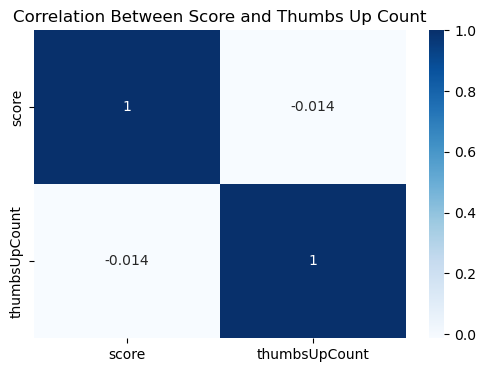

In [62]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['score', 'thumbsUpCount']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Between Score and Thumbs Up Count")
plt.show()


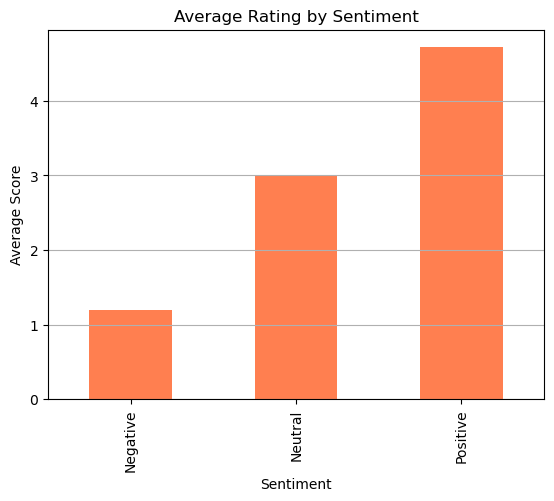

In [64]:
df.groupby('sentiment')['score'].mean().plot(kind='bar', color='coral')
plt.title("Average Rating by Sentiment")
plt.ylabel("Average Score")
plt.xlabel("Sentiment")
plt.grid(axis='y')
plt.show()


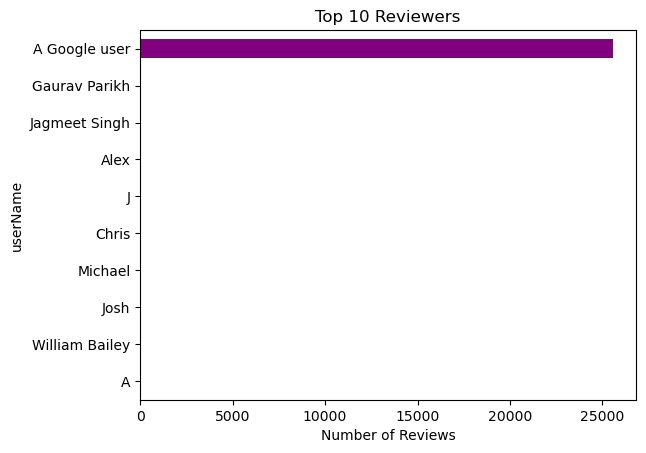

In [94]:
top_users = df['userName'].value_counts().head(10)
top_users.plot(kind='barh', color='purple')
plt.xlabel("Number of Reviews")
plt.title("Top 10 Reviewers")
plt.gca().invert_yaxis()
plt.show()
